# Data Importing

In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv("bank-full (1).csv",sep=";")

## EDA

In [3]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
#no null values 

In [8]:
df["y"].value_counts(normalize=True)*100

y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64

### converting data in binary( Changing yes and no columns to 1 and 0)

In [19]:
df["default"].replace({"no":0,"yes":1},inplace=True)
df["housing"].replace({"no":0,"yes":1},inplace=True)
df["loan"].replace({"no":0,"yes":1},inplace=True)
df["y"].replace({"no":0,"yes":1},inplace=True)

In [20]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [21]:
df.shape

(45211, 17)

# Vizualization

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd   

In [23]:
df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

<AxesSubplot:xlabel='loan'>

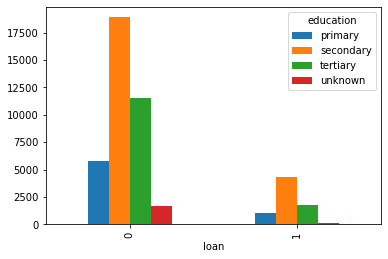

In [24]:
pd.crosstab(df.loan,df.education).plot(kind="bar")

<AxesSubplot:ylabel='marital'>

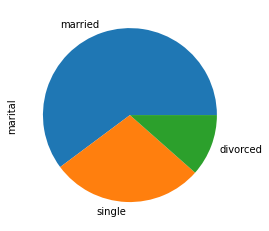

In [25]:
df.marital.value_counts().plot(kind="pie")

In [26]:
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

<AxesSubplot:>

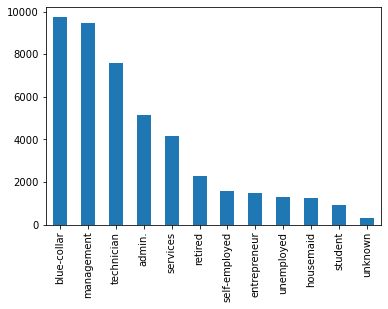

In [27]:
df.job.value_counts().plot(kind="bar")

In [28]:
df.loan.value_counts(normalize=True),df.housing.value_counts(normalize=True)

(0    0.839774
 1    0.160226
 Name: loan, dtype: float64,
 1    0.555838
 0    0.444162
 Name: housing, dtype: float64)

<AxesSubplot:xlabel='loan'>

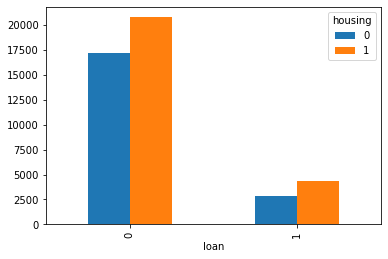

In [29]:
pd.crosstab(df.loan,df.housing).plot(kind="bar")

In [30]:
df.age.value_counts(normalize=True)

32    0.046117
31    0.044149
33    0.043618
34    0.042689
35    0.041892
        ...   
93    0.000044
90    0.000044
95    0.000044
88    0.000044
94    0.000022
Name: age, Length: 77, dtype: float64

In [31]:
#converting categorical data into numeric

In [32]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [33]:
df_1=pd.get_dummies(df,columns=['job','marital','education','month','contact','poutcome'])

In [34]:
df_1.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_nov,month_oct,month_sep,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,1,0,0,0,1


In [35]:
df_1.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [37]:
x=df_1.drop(["y"],1)
x

C:\Users\shrin\AppData\Local\Temp/ipykernel_25800/441075783.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x=df_1.drop(["y"],1)


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_nov,month_oct,month_sep,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,1,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,...,1,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,...,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,508,4,-1,0,...,1,0,0,0,1,0,0,0,0,1


In [38]:
#divide data into x=indipendent variable  y= dependant variable/target variable
x=pd.concat([df_1.iloc[:,0:10],df_1.iloc[:,11:]],axis=1)
x

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_nov,month_oct,month_sep,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,1,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,...,1,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,...,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,508,4,-1,0,...,1,0,0,0,1,0,0,0,0,1


In [39]:
y=df_1["y"]
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

# Model Building

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
classifier=LogisticRegression()

In [42]:
classifier.fit(x,y)

C:\Users\shrin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
#Predict for X dataset
y_pred = classifier.predict(x)

In [44]:
y_pred_df= pd.DataFrame({'actual': y,'predicted_prob': classifier.predict(x)})
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [45]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix)

[[39153   769]
 [ 4125  1164]]


In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.8917520072548716

In [47]:
accuracy=((39152+1162)/(39152+1162+4127+770))*100
accuracy

89.1685651721926

In [48]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.22      0.32      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



In [49]:
# ROC Curve

Text(0, 0.5, 'True Positive Rate')

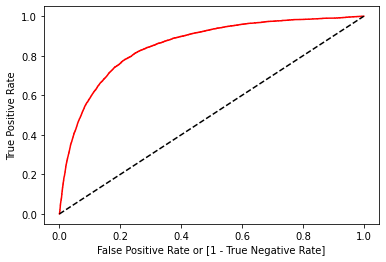

In [50]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (x)[:,1])

auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [61]:
auc

0.6004084240502673